In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
mouse_metadata_path = "C:\\Users\\M.Sam\\Downloads\\module_5_starter_code\\module_5_starter_code\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\M.Sam\\Downloads\\module_5_starter_code\\module_5_starter_code\\Pymaceuticals\\data\\Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, on="Mouse ID", how='right')
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
#Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Remove duplicates. Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID
    

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Standard_dev = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Display
regimen_summary_df = pd.DataFrame({ "Mean": Mean, "Median": Median, "Variance": Variance, "Standard Deviation": Standard_dev, "SEM": SEM})
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Using the aggregation method, produce the same summary statistics in a single line.
Drug_regimen = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
Drug_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [16]:
# Create a bar chart using Pandas
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [19]:
mouse_count_df = mousecount_df.plot.bar(x="Drug Regimen",y="Mouse Count")
plt.ylabel("Number of mice")
plt.title("Mice Count per treatment")
plt.show()

NameError: name 'mousecount_df' is not defined

Text(0.5, 1.0, 'Number of Mice per Treatment')

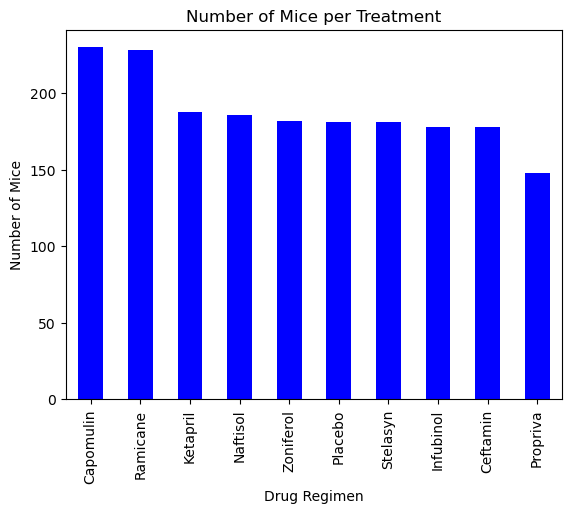

In [20]:
plot_pandas = mice_count.plot.bar(color='blue')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

Text(0, 0.5, 'Points')

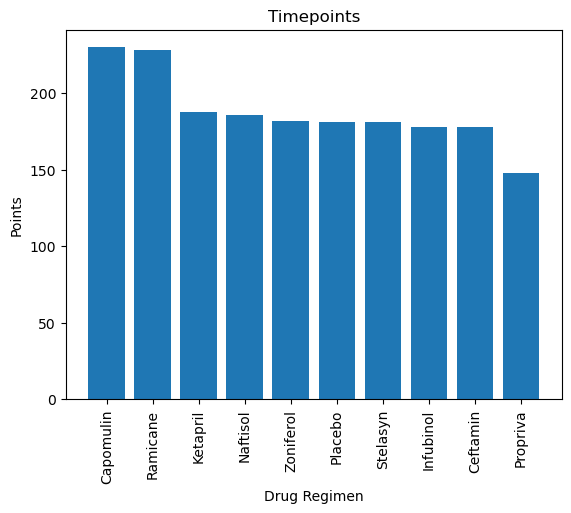

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
points = clean_df["Drug Regimen"].value_counts()
points

plt.bar(points.index.values,points.values)

plt.title("Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Points")


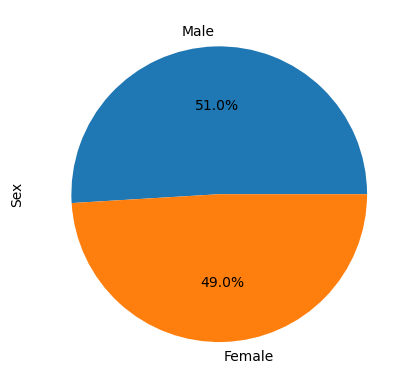

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
points = clean_df["Sex"].value_counts()
points

points.plot(kind= "pie", autopct="%1.1f%%")

plt.show()

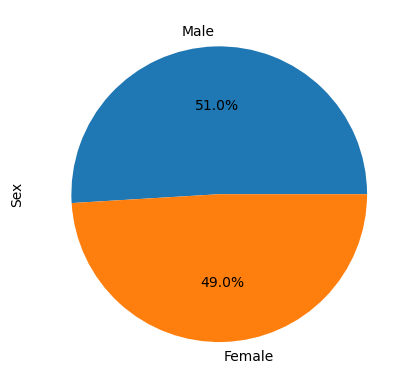

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(points.values, labels=points.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

max_tumour = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

max_tumour = max_tumour.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = max_tumour.merge(clean_df,on = ["Mouse ID", "Timepoint"], how = "left")

merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [28]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for Drug in treatment_list:  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vol = merge_df.loc[merge_df["Drug Regimen"]==Drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)] 
    
    print(f"{Drug}'s outliers: {outliers}")

Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


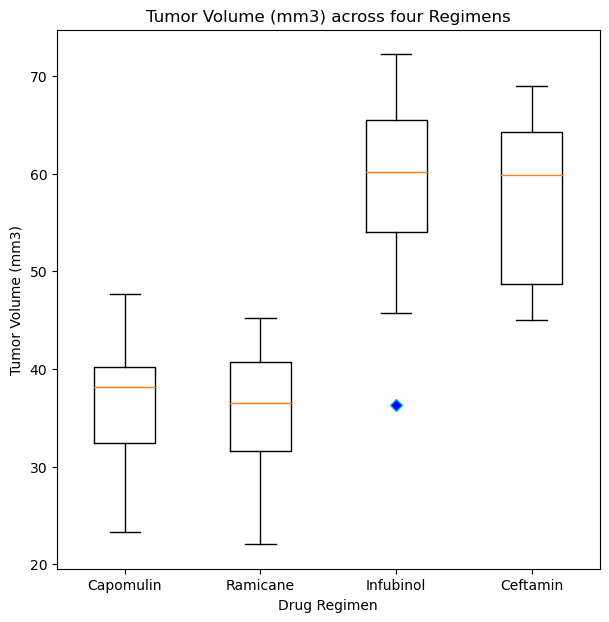

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

blue_dot = dict(markerfacecolor="b",marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol_list, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(treatment_list) + 1),ticklabels=treatment_list)

plt.show()

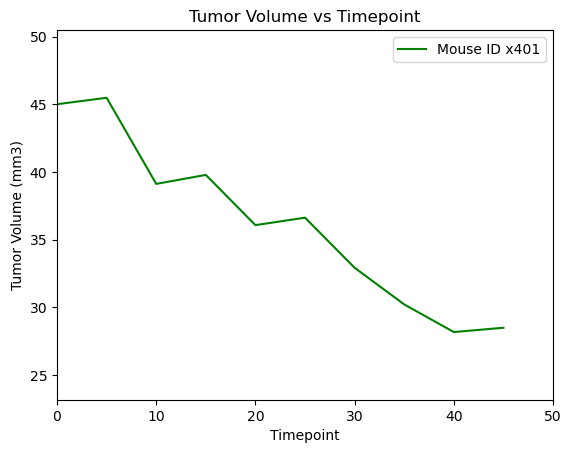

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

random_mouse = (clean_df[clean_df["Drug Regimen"]=="Capomulin"]).sample()
random_data = pd.merge(clean_df, random_mouse, on="Mouse ID", how="inner")
random_df = random_data.drop([col for col in random_data.columns if '_y' in col], axis=1)

time = random_df["Timepoint_x"]
vol = random_df["Tumor Volume (mm3)_x"]
label = random_df["Mouse ID"].unique()

#print(random_mouse["Mouse ID"])
line, = plt.plot(time, vol, 'g-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, time.max() + 5)
plt.ylim(vol.min() - 5, vol.max() + 5)
plt.legend("Mouse ID " +label)
plt.show()

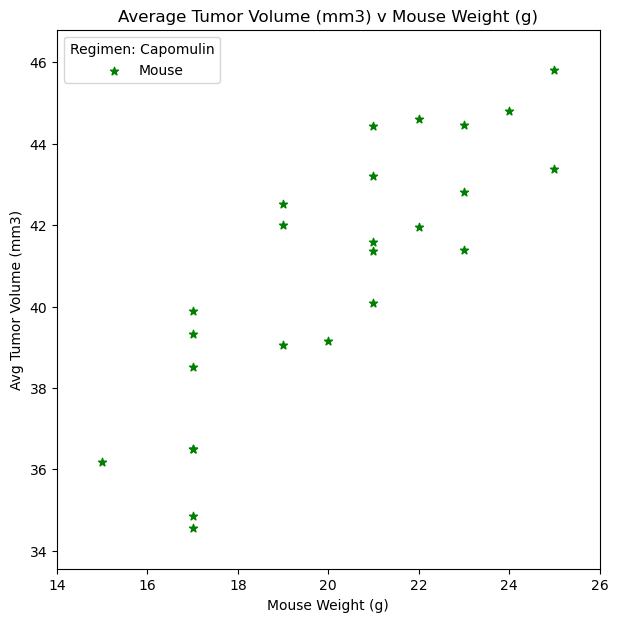

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
tvolume = regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = regimen.groupby(["Mouse ID"])["Weight (g)"].mean()

mouse_vol_wt = pd.merge(tvolume,mouse_weight, on="Mouse ID", how="inner")
mouse_vol_wt = mouse_vol_wt.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
vol = mouse_vol_wt.iloc[:,0]
wt = mouse_vol_wt.iloc[:,1]

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="*", facecolors="green", edgecolors="green")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.show()

In [34]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr_coef = round(st.pearsonr(wt, vol)[0],2)
print(f"The correlation coefficient between Average Tumor Volume and Mouse Weight is {corr_coef}")

The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.84


In [ ]:
#Analysis: 
#The total number of mice is 248. The proportion of gender is 49% female and 51% male. 
#The analysis shows a 2% difference. Gender doesn't have a high significance as a variable to the study.
#The bar chart showed that the drug Capomulin has the maximum mice number (230), and Propriva has the smallest mice number (148). 
#This means the study focused toward Capomulin compared to the other treatments.

#The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation.
#If the mouse weight increases the average tumor volume also increases. 

#From the selected drugs, Capomulin and Ramicane reduce the size of tumors better than others drugs.